Necessary Imports

In [38]:
from prophet import Prophet
import yfinance as yf
from matplotlib import pyplot as plt
import warnings
import numpy as np


Supress Warnings

In [28]:
warnings.filterwarnings("ignore")

Download the Dataset

In [40]:
df = yf.download("NVDA", "2000-01-01","2024-05-10")
df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-03,877.890015,892.809998,870.400024,887.890015,887.890015,39834100
2024-05-06,893.900024,922.200012,890.549988,921.400024,921.400024,37620300
2024-05-07,910.979980,917.809998,823.250000,905.539978,905.539978,43734200
2024-05-08,894.830017,911.940002,894.200012,904.119995,904.119995,32471700
2024-05-09,905.369995,910.719971,882.309998,893.349976,893.349976,24102003


Exploratory Data Analysis

In [48]:
print(list(df.columns))

['Date', 'Close']


In [46]:
df.describe()

,Date,Close
count,6127,6127.000000
mean,2012-03-07 11:03:42.686469632,54.543838
min,2000-01-03 00:00:00,0.614167
25%,2006-02-06 12:00:00,2.952917
50%,2012-03-07 00:00:00,4.690000
75%,2018-04-09 12:00:00,42.355000
max,2024-05-09 00:00:00,950.020020
std,NaN,126.004282


In [44]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [45]:
df.isna().sum()

Date     0
Close    0
dtype: int64

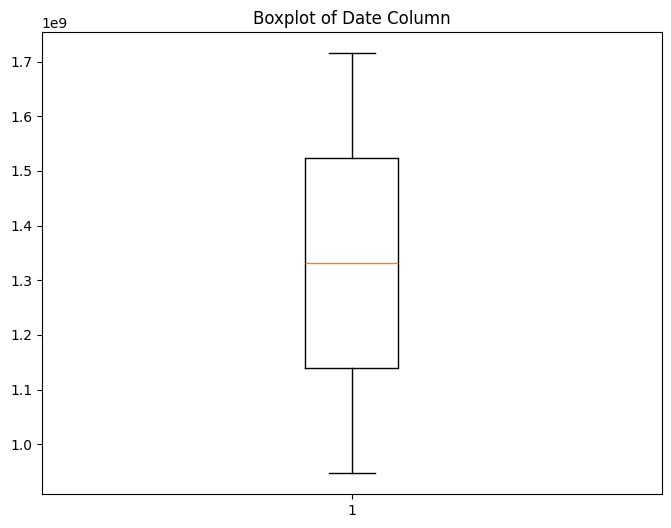

In [52]:

Date_Modified = df['Date'].astype('int64') // 10**9  

plt.figure(figsize=(8, 6))
plt.boxplot(Date_Modified)
plt.title('Boxplot of ' + 'Date Column')
plt.show()

# Result -> No outliers

Target Feature Selection

In [41]:
# Target Column -> Closing Price
df = df[['Close']]
df.tail()

,Close
Date,
2024-05-03,887.890015
2024-05-06,921.400024
2024-05-07,905.539978
2024-05-08,904.119995
2024-05-09,893.349976


Reset the Date Column position

In [42]:
df = df.reset_index()
df.head()

,Date,Close
0,2000-01-03,0.975260
1,2000-01-04,0.949219
2,2000-01-05,0.917969
3,2000-01-06,0.858073
4,2000-01-07,0.872396


Rename columns

In [33]:
df.columns=['ds','y']
df.tail()

,ds,y
6122,2024-05-03,887.890015
6123,2024-05-06,921.400024
6124,2024-05-07,905.539978
6125,2024-05-08,904.119995
6126,2024-05-09,892.840027


Fit the data onto Prophet Object

In [34]:
version=Prophet()
version.fit(df)

22:17:54 - cmdstanpy - INFO - Chain [1] start processing
22:17:55 - cmdstanpy - INFO - Chain [1] done processing


Forecasting

In [35]:
for_making_forecast = version.make_future_dataframe(365)
for_making_forecast.head()

,ds
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07


In [36]:
actual_forecast = version.predict(for_making_forecast)
actual_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-03,1.453559,-67.275293,65.698875,1.453559,1.453559,-2.884188,-2.884188,-2.884188,0.470178,0.470178,0.470178,-3.354365,-3.354365,-3.354365,0.0,0.0,0.0,-1.430629
1,2000-01-04,1.454325,-67.338798,63.162936,1.454325,1.454325,-3.283310,-3.283310,-3.283310,0.011497,0.011497,0.011497,-3.294808,-3.294808,-3.294808,0.0,0.0,0.0,-1.828985
2,2000-01-05,1.455092,-68.030012,62.639859,1.455092,1.455092,-3.344118,-3.344118,-3.344118,-0.110426,-0.110426,-0.110426,-3.233691,-3.233691,-3.233691,0.0,0.0,0.0,-1.889026
3,2000-01-06,1.455858,-68.089586,60.851110,1.455858,1.455858,-2.948810,-2.948810,-2.948810,0.221991,0.221991,0.221991,-3.170801,-3.170801,-3.170801,0.0,0.0,0.0,-1.492952
4,2000-01-07,1.456624,-60.489511,65.315083,1.456624,1.456624,-3.227611,-3.227611,-3.227611,-0.121837,-0.121837,-0.121837,-3.105775,-3.105775,-3.105775,0.0,0.0,0.0,-1.770987


Plotting the Forecast

Text(74.59722222222221, 0.5, 'Closing price')

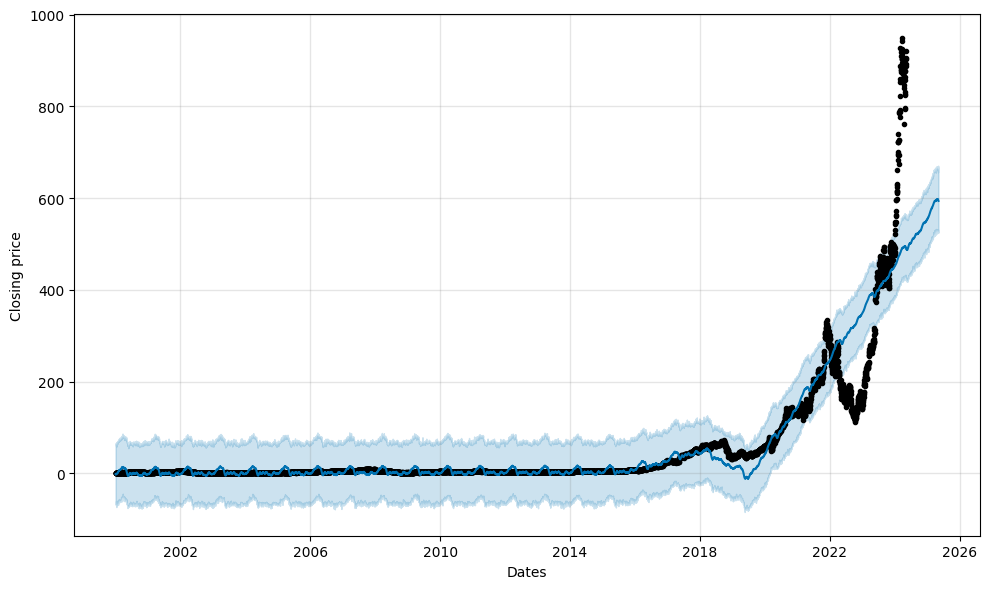

In [37]:
version.plot(actual_forecast)
plt.xlabel('Dates')
plt.ylabel('Closing price')